d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

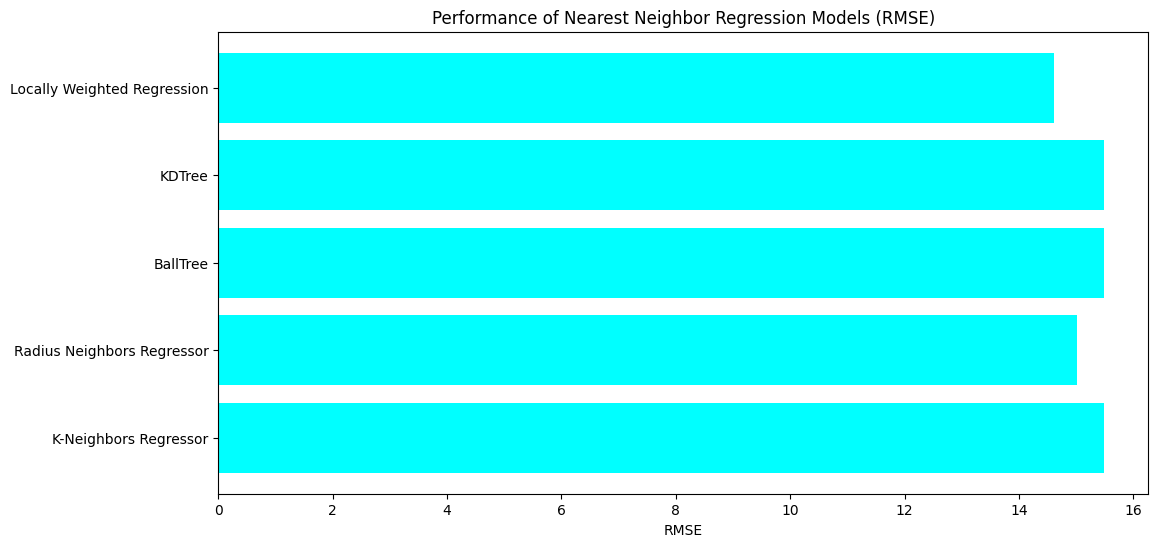

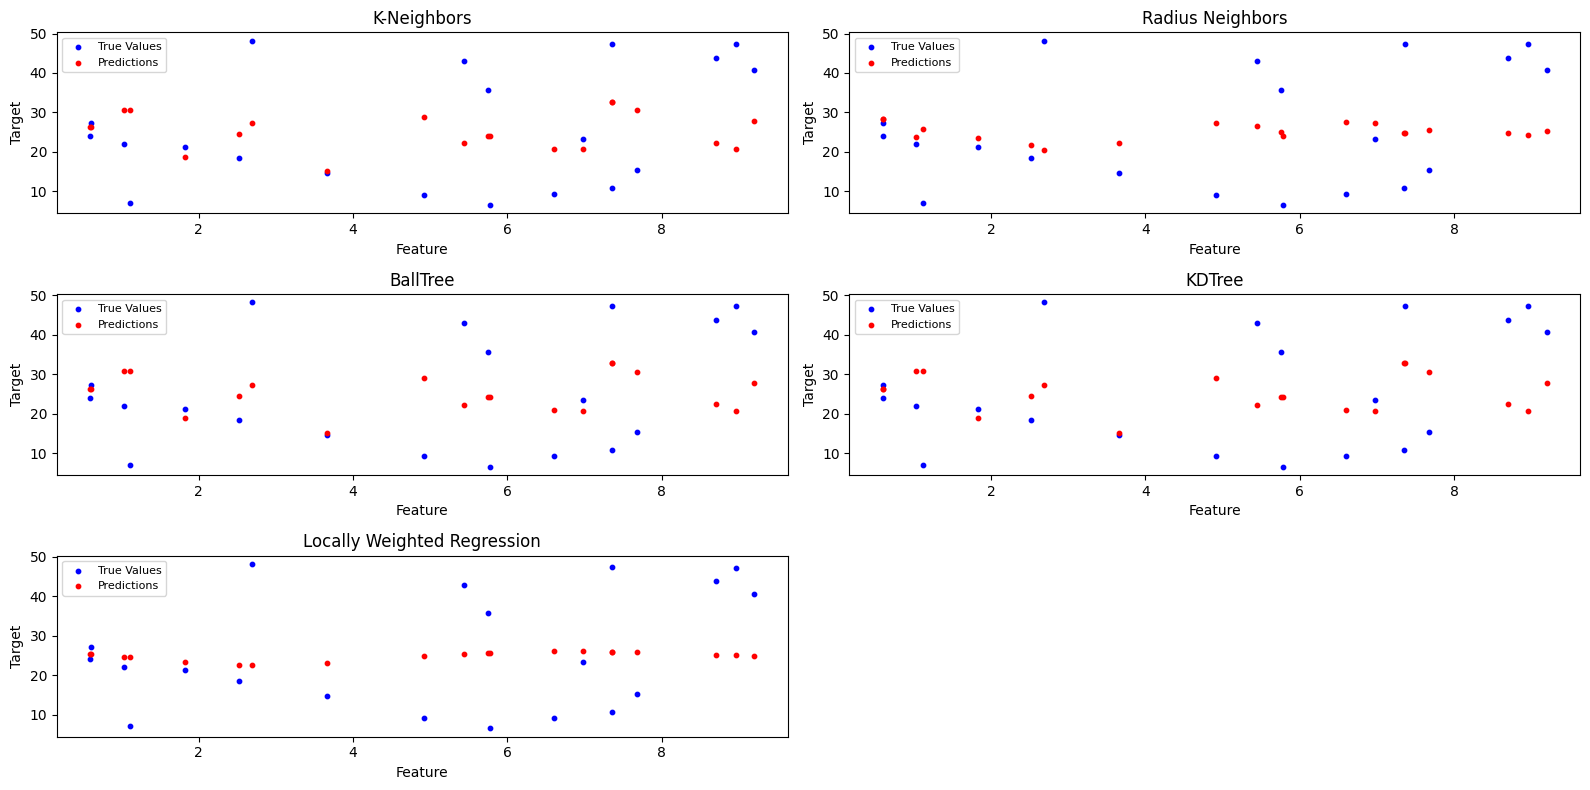

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.neighbors import BallTree, KDTree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models_nearest_neighbor = {
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Radius Neighbors Regressor": RadiusNeighborsRegressor(radius=1.0),
}

# BallTree and KDTree for KNN
ball_tree = BallTree(X_train)
kd_tree = KDTree(X_train)

from scipy.stats import mode

# Predict using BallTree
dist, ind = ball_tree.query(X_test, k=5)
y_pred_ball_tree = np.array([np.mean(y_train[ind[i]]) for i in range(len(ind))])

# Predict using KDTree
dist, ind = kd_tree.query(X_test, k=5)
y_pred_kd_tree = np.array([np.mean(y_train[ind[i]]) for i in range(len(ind))])

# Locally Weighted Regression
def locally_weighted_regression(X_train, y_train, X_test, tau=1.0):
    y_pred = []
    for x in X_test:
        weights = np.exp(-np.sum((X_train - x) ** 2, axis=1) / (2 * tau ** 2))
        weighted_avg = np.sum(weights * y_train) / np.sum(weights)
        y_pred.append(weighted_avg)
    return np.array(y_pred)

y_pred_lwr = locally_weighted_regression(X_train, y_train, X_test)

# Evaluate all models
results = {
    "K-Neighbors Regressor": mean_squared_error(y_test, models_nearest_neighbor["K-Neighbors Regressor"].fit(X_train, y_train).predict(X_test), squared=False),
    "Radius Neighbors Regressor": mean_squared_error(y_test, models_nearest_neighbor["Radius Neighbors Regressor"].fit(X_train, y_train).predict(X_test), squared=False),
    "BallTree": mean_squared_error(y_test, y_pred_ball_tree, squared=False),
    "KDTree": mean_squared_error(y_test, y_pred_kd_tree, squared=False),
    "Locally Weighted Regression": mean_squared_error(y_test, y_pred_lwr, squared=False),
}

# Visualize RMSE
plt.figure(figsize=(12, 6))
plt.barh(list(results.keys()), list(results.values()), color='cyan')
plt.xlabel("RMSE")
plt.title("Performance of Nearest Neighbor Regression Models (RMSE)")
plt.show()

# Visualize Predictions vs. True Values
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate({
    "K-Neighbors": models_nearest_neighbor["K-Neighbors Regressor"].predict(X_test),
    "Radius Neighbors": models_nearest_neighbor["Radius Neighbors Regressor"].predict(X_test),
    "BallTree": y_pred_ball_tree,
    "KDTree": y_pred_kd_tree,
    "Locally Weighted Regression": y_pred_lwr,
}.items()):
    plt.subplot(3, 2, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()


基于最近邻的回归模型利用样本之间的距离关系来进行回归预测。这种模型不假设数据的分布形式，依赖于训练数据的局部结构。

---

### **基于最近邻的回归模型分类**

#### **1. K-Neighbors Regressor**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 对每个测试样本，找到其最近的 `k` 个邻居，预测值为邻居目标值的加权平均值。
  - 加权方式通常与距离成反比。
- **适用场景**:
  - 数据分布未知，非线性关系明显。
- **优缺点**:
  - **优点**: 简单、易于实现，适合非线性数据。
  - **缺点**: 对高维数据表现较差，预测时间较长。

#### **2. Radius Neighbors Regressor**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 类似于 K-Neighbors，但使用固定半径内的邻居进行预测。
- **适用场景**:
  - 数据分布稀疏且对局部特征敏感的任务。
- **优缺点**:
  - **优点**: 自动根据局部数据分布调整预测。
  - **缺点**: 半径选择对性能影响较大。

#### **3. BallTree / KDTree-Based Regressors**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 加速最近邻搜索，适用于大规模数据。
- **适用场景**:
  - 需要高效最近邻查找的任务。
- **优缺点**:
  - **优点**: 查询效率高，适合大规模数据。
  - **缺点**: 构建树的时间开销较大。

#### **4. Locally Weighted Regression**
- **实现库**: 自定义实现或扩展库
- **特点**:
  - 对每个测试点，根据距离加权训练样本，拟合局部回归模型。
- **适用场景**:
  - 数据具有明显局部特性的任务。
- **优缺点**:
  - **优点**: 灵活，能够捕获局部特征。
  - **缺点**: 计算复杂度高，对噪声敏感。

---


### **模型选型建议**

| **任务特点**               | **推荐模型**                                       |
|----------------------------|---------------------------------------------------|
| 数据分布未知，非线性关系   | K-Neighbors Regressor                             |
| 数据稀疏                   | Radius Neighbors Regressor                        |
| 大规模数据，需加速搜索     | BallTree / KDTree                                |
| 局部特性显著，需局部拟合   | Locally Weighted Regression                       |

